<a href="https://colab.research.google.com/github/vaitulsidhdhapara/Bike-Sharing-Demand-Prediction/blob/main/Final_Colab_Bike_Sharing_Demand_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

In [ ]:
import pandas as pd
import numpy as np
from numpy import math
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


import datetime as dt
from datetime import datetime

# Importing Models libraries

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
a=pd.read_csv("/content/drive/MyDrive/SeoulBikeData.csv",encoding= 'unicode_escape')

In [ ]:
a.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [ ]:
a.shape

(8760, 14)

In [ ]:
a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [ ]:
a.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Date,8760,365,01/12/2017,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Rented Bike Count,8760.0,NaN,NaN,NaN,704.602055,644.997468,0.0,191.0,504.5,1065.25,3556.0
Hour,8760.0,NaN,NaN,NaN,11.5,6.922582,0.0,5.75,11.5,17.25,23.0
Temperature(°C),8760.0,NaN,NaN,NaN,12.882922,11.944825,-17.8,3.5,13.7,22.5,39.4
Humidity(%),8760.0,NaN,NaN,NaN,58.226256,20.362413,0.0,42.0,57.0,74.0,98.0
Wind speed (m/s),8760.0,NaN,NaN,NaN,1.724909,1.0363,0.0,0.9,1.5,2.3,7.4
Visibility (10m),8760.0,NaN,NaN,NaN,1436.825799,608.298712,27.0,940.0,1698.0,2000.0,2000.0
Dew point temperature(°C),8760.0,NaN,NaN,NaN,4.073813,13.060369,-30.6,-4.7,5.1,14.8,27.2
Solar Radiation (MJ/m2),8760.0,NaN,NaN,NaN,0.569111,0.868746,0.0,0.0,0.01,0.93,3.52
Rainfall(mm),8760.0,NaN,NaN,NaN,0.148687,1.128193,0.0,0.0,0.0,0.0,35.0


In [ ]:
# Find the null value
a.isna().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

In [ ]:
# find duplicate values
len(a[a.duplicated()])

0

Here not any missing and duplicate values in the dataset.

**DATA** **CLEANING**

In [ ]:
# Rename the columns
a=a.rename(columns={'Rented Bike Count':'Rented_Bike_Count','Temperature(°C)':'Temperature','Humidity(%)':'Humidity',
                      'Wind speed (m/s)':'Wind_speed','Visibility (10m)':'Visibility','Dew point temperature(°C)':'Dew_point_temperature',
                      'Solar Radiation (MJ/m2)':'Solar_Radiation','Rainfall(mm)':'Rainfall',
                      'Snowfall (cm)':'Snowfall','Functioning Day':'Functioning_Day'})

In [ ]:
a.head()

,Date,Rented_Bike_Count,Hour,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning_Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [ ]:
# first we convert Date column in to datetitme format
a["Date"]=pd.to_datetime(a["Date"])
a["Month"]=a["Date"].dt.month

#to get the day of week
a['day'] = a['Date'].dt.day_name() 

# we converted it into binary class as Weekdays = 0 & Weekend 1.
a['weekdays_weekend']=a["day"].apply(lambda x: 1 if x=="Saturday" or x=="Sunday" else 0)

# Droping unnecessary columns.
# Year basically contains details from 2017 december to 2018 november so we considers this is one year.
a=a.drop(columns=['day',"Date"],axis=1)




In [ ]:
a['weekdays_weekend'].value_counts()

0    6216
1    2544
Name: weekdays_weekend, dtype: int64

In [ ]:
a['Seasons'].value_counts()

Spring    2208
Summer    2208
Autumn    2184
Winter    2160
Name: Seasons, dtype: int64

In [ ]:
a['Holiday'].value_counts()

No Holiday    8328
Holiday        432
Name: Holiday, dtype: int64

In [ ]:
a

,Rented_Bike_Count,Hour,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning_Day,Month,weekdays_weekend
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,0
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,0
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,1,0
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,0
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes,11,0
8756,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes,11,0
8757,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes,11,0
8758,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes,11,0


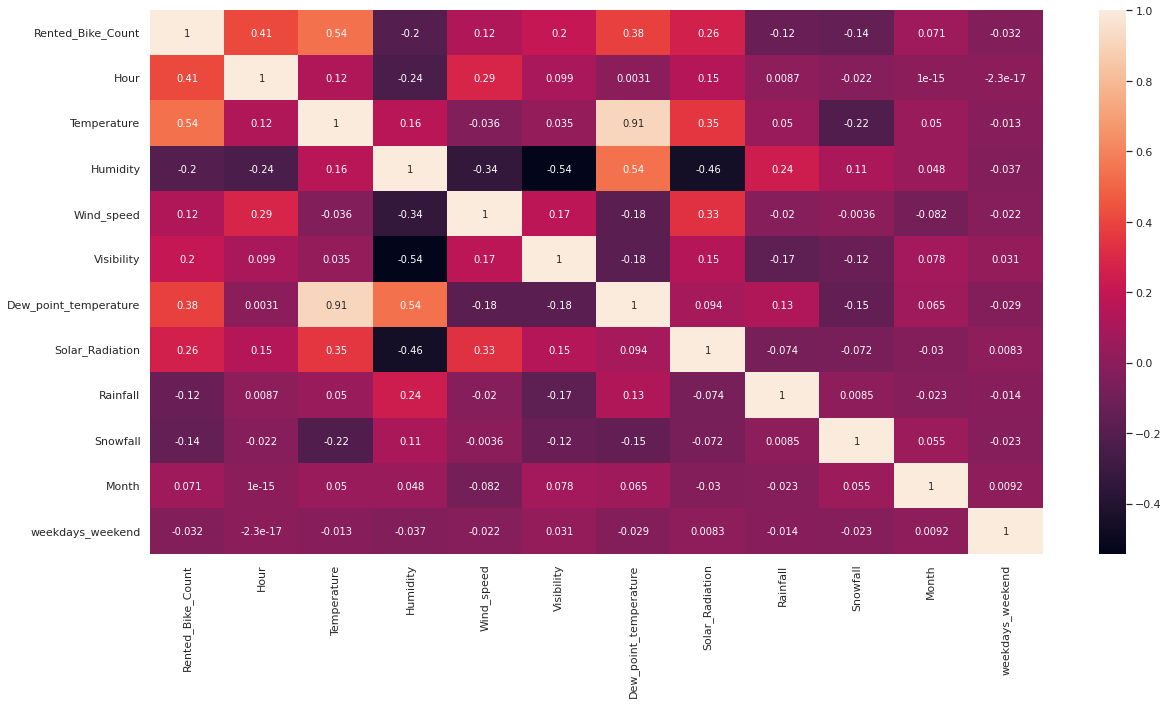

In [ ]:
# constructing heat map
plt.figure(figsize=(20,10))
sns.heatmap(a.corr(),annot=True)
plt.show()

**Obeservations:**

1.   Humidity has low correlation with visibility due to solar radiation.
2.   Dew point temperature and temperature are highly related.


In [ ]:
# Droping highly correlated features for eleminating Multico-linearity
a=a.drop(['Dew_point_temperature'],axis=1)

**EDA (EXPLORATORY DATA ANALYSIS)**

**Univariate Analysis :**

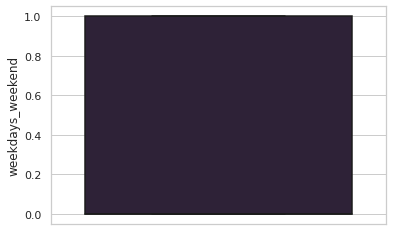

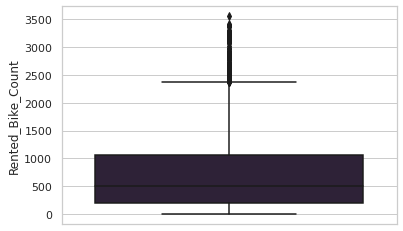

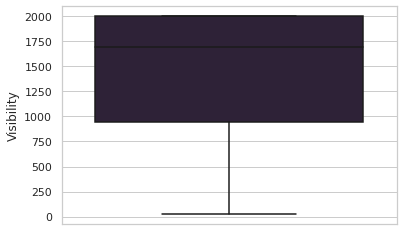

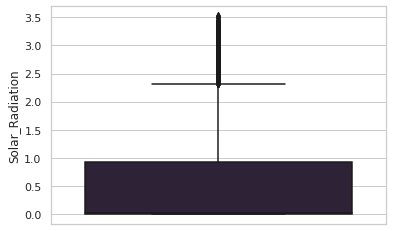

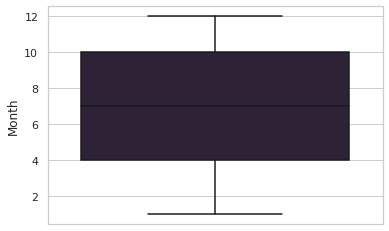

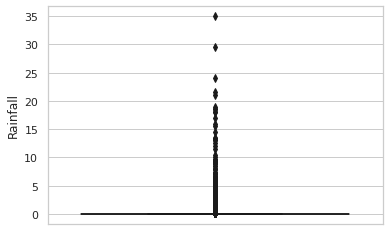

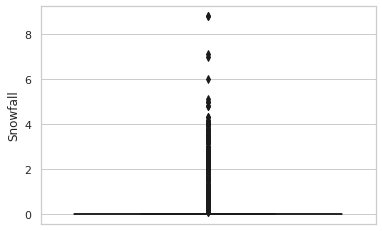

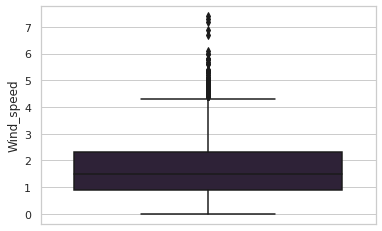

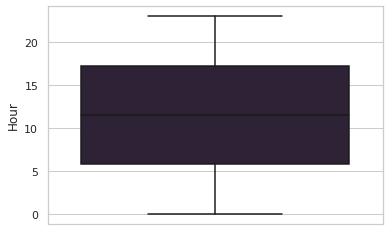

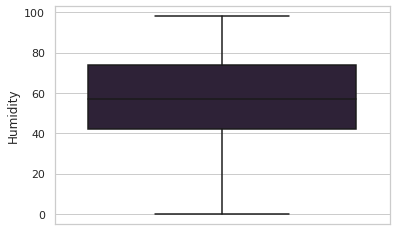

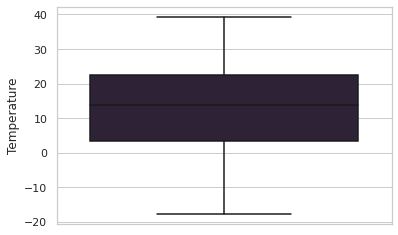

In [ ]:
# Numerical features plotting

n_var = list(set(a.describe()))
for i in n_var:
    sns.boxplot(y = a[i])
    plt.show()

In [ ]:
# cateogrical feature plotting

c_var = list(set(a.describe(include = 'all')) - set(a.describe()))
c_var

['Holiday', 'Seasons', 'Functioning_Day']

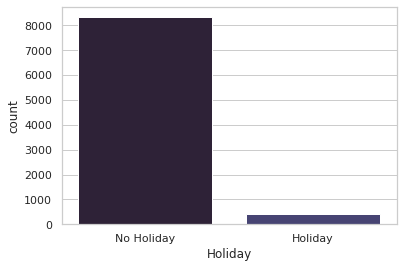

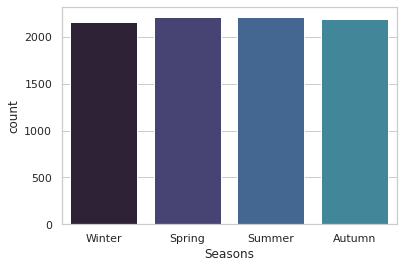

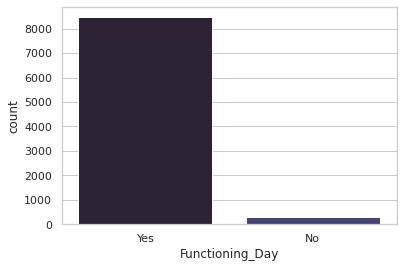

In [ ]:
for i in c_var:
    sns.countplot(x = a[i],)
    plt.show()

**Bivariate Analysis :**

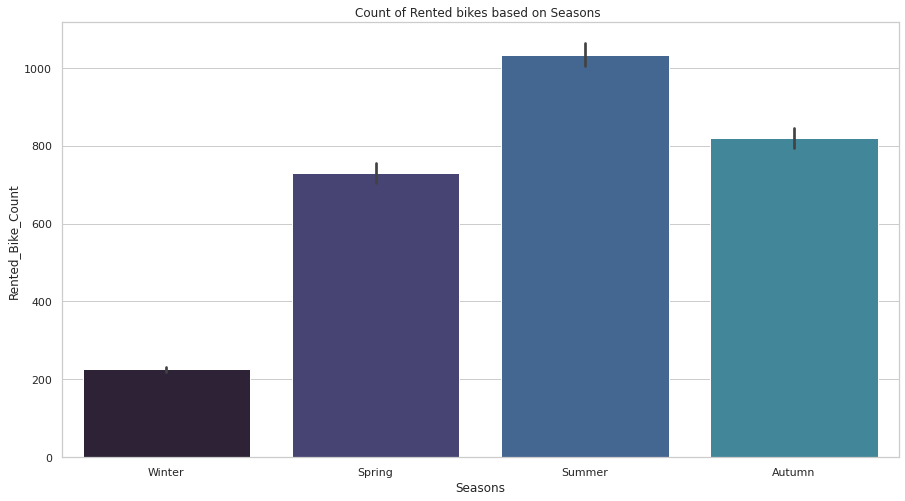

In [ ]:
# Analysis of data by vizualisation using seasons and rented bike count.

plt.rcParams["figure.figsize"]=(15,8)
sns.barplot(a['Seasons'],a['Rented_Bike_Count'])
plt.title('Count of Rented bikes based on Seasons ')
plt.show()



**Obeservations:**

Maximum number of bike rentals in Summer season, while in winter season the bike rentend bike count is low.

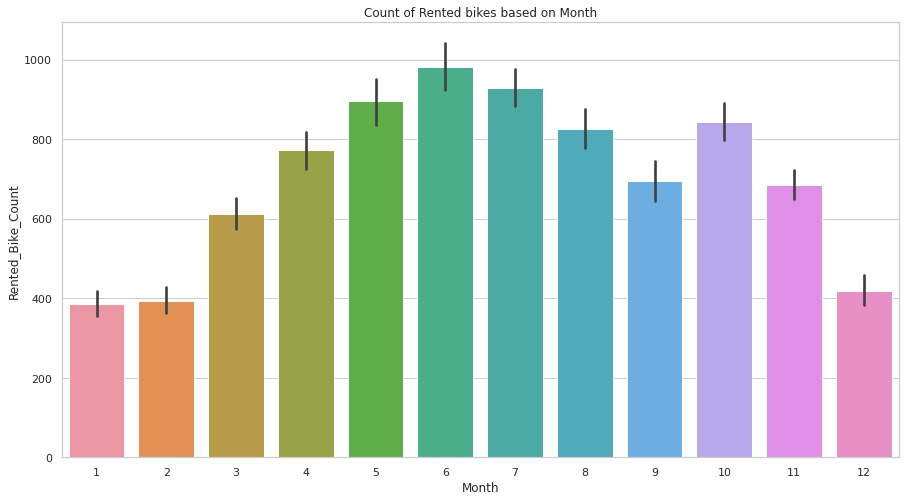

In [ ]:
#Anlysis of data by vizualisation using month and rented bike count.

plt.rcParams["figure.figsize"]=(15,8)
sns.barplot(x=a['Month'],y=a['Rented_Bike_Count'])
plt.title('Count of Rented bikes based on Month')
plt.show()

**Observation:**

The demand of the rented bike is high between 5 to 10 months as compare to other months.

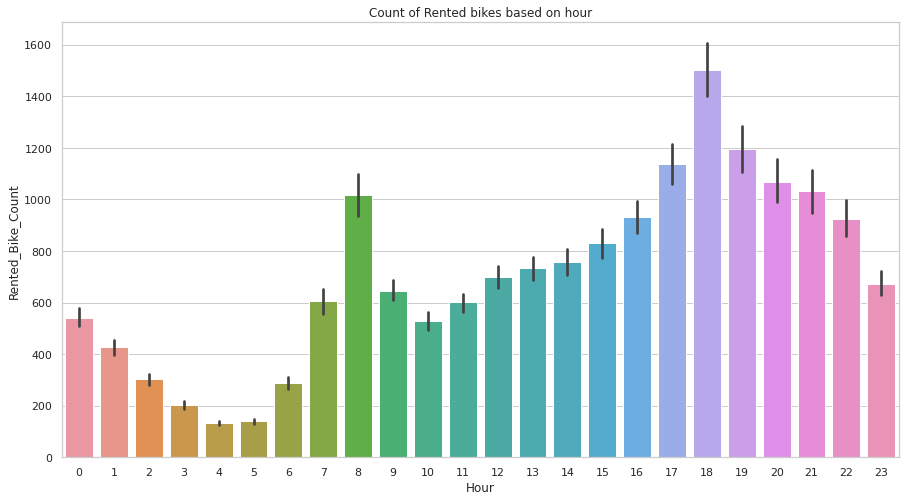

In [ ]:
# Anlysis of data by vizualisation using hour and rented bike count.

plt.rcParams["figure.figsize"]=(15,8)
sns.barplot(x=a['Hour'],y=a['Rented_Bike_Count'])
plt.title('Count of Rented bikes based on hour')
plt.show()

**Observation:**

People generally use rented bikes during their working hour from 7 AM - 9 AM to 5 PM- 8 PM.

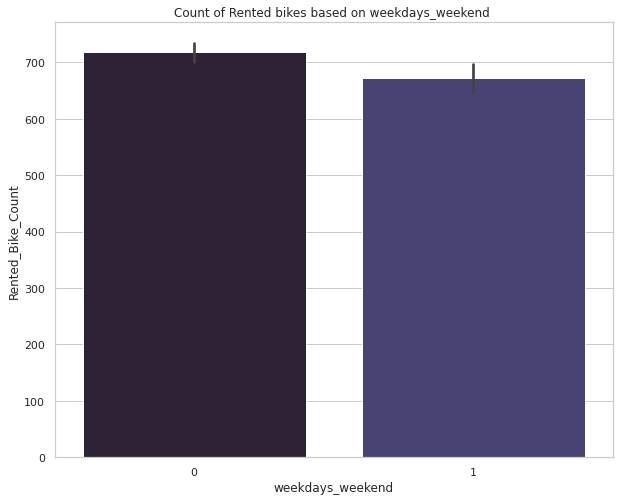

In [ ]:
# Anlysis of data by vizualisation using weekdays-weekend and rented bike count.

plt.rcParams["figure.figsize"]=(10,8)
sns.barplot(x=a['weekdays_weekend'],y=a['Rented_Bike_Count'])
plt.title('Count of Rented bikes based on weekdays_weekend ')
plt.show()

**Observation:**

In the week days the demand of the bike is higher because of the office as compare to the weekend.

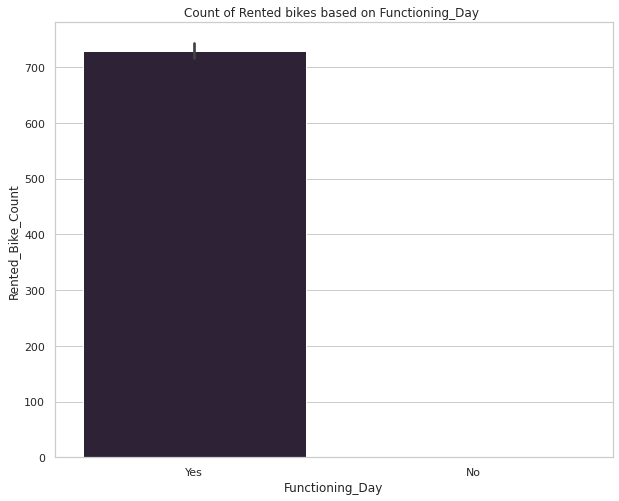

In [ ]:
# Anlysis of data by vizualisation using functioning day and rented bike count.

plt.rcParams["figure.figsize"]=(10,8)
sns.barplot(x=a['Functioning_Day'],y=a['Rented_Bike_Count'])
plt.title('Count of Rented bikes based on Functioning_Day ')
plt.show()

**Observation:**

People use rented bike only in functioning day

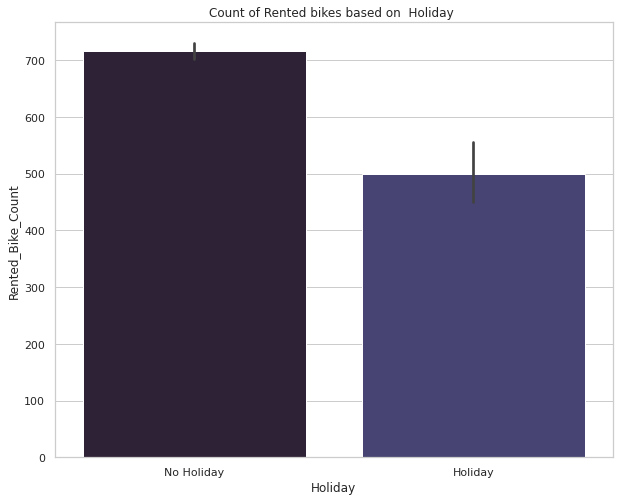

In [ ]:
#anlysis of data by vizualisation using holiday and rented bike count.

plt.rcParams["figure.figsize"]=(10,8)
sns.barplot(x=a['Holiday'],y=a['Rented_Bike_Count'])
plt.title('Count of Rented bikes based on  Holiday ')
plt.show()

**Observation:**

Use of rented bike is more on 'No holiday' means on working days as compare to 'Holiday'.

**VISUALIZING THE DISTRIBUTIONS**

**Visualizing numerical variables distplot :**

In [ ]:
# Numerical variable name

num_fe= list(set(a.describe()))
num_fe

['weekdays_weekend',
 'Rented_Bike_Count',
 'Visibility',
 'Solar_Radiation',
 'Month',
 'Rainfall',
 'Snowfall',
 'Wind_speed',
 'Hour',
 'Humidity',
 'Temperature']

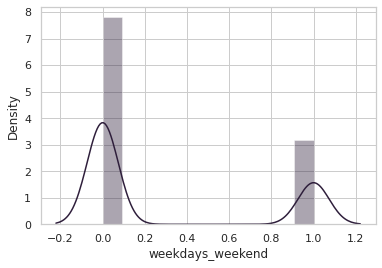

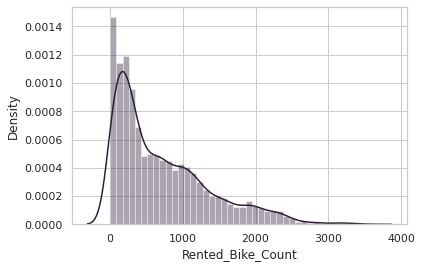

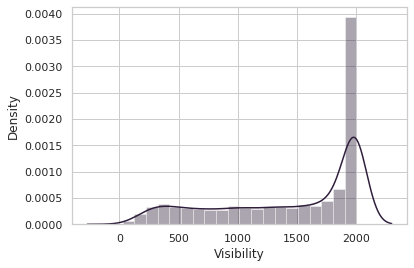

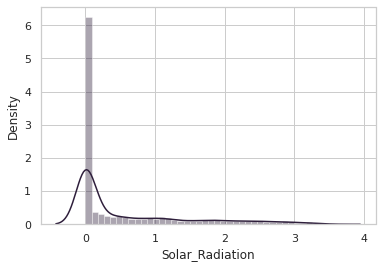

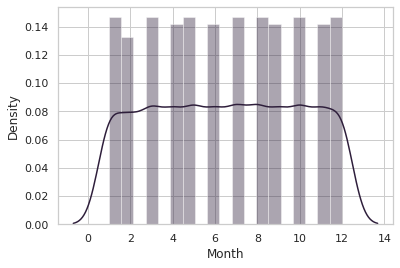

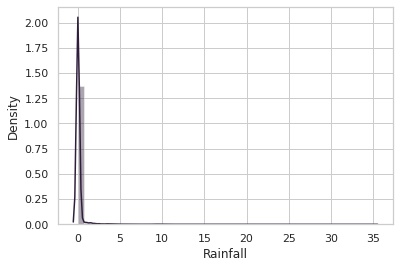

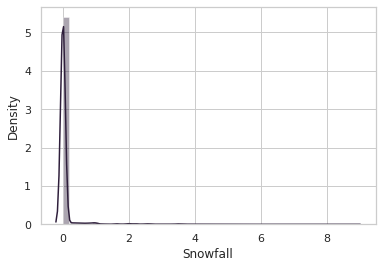

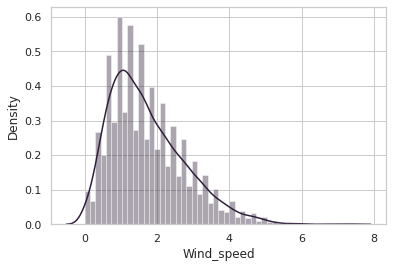

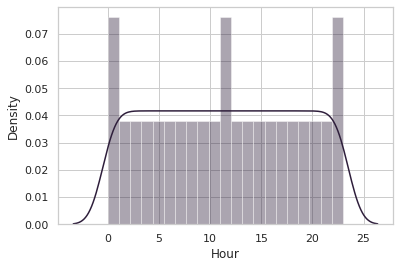

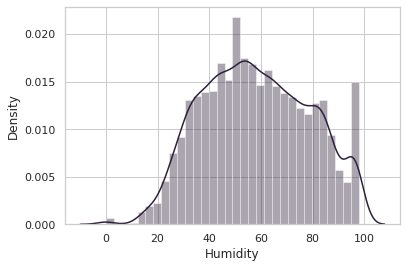

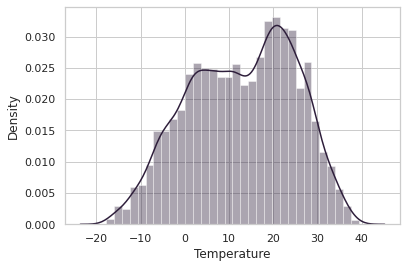

In [ ]:
#plotting distplots to analyze the distribution of all numerical features
for col in num_fe:
  plt.figure(figsize=(6,4))
  sns.distplot(x=a[col])
  plt.xlabel(col)
plt.show()

**Observation:**

Some of the distributions are rightly skewed while some are leftly skewed

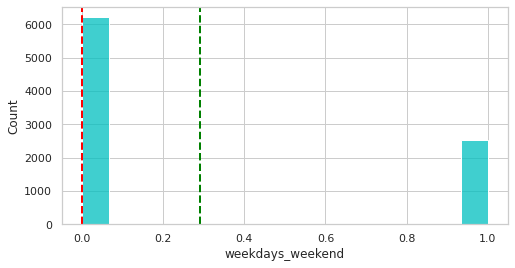

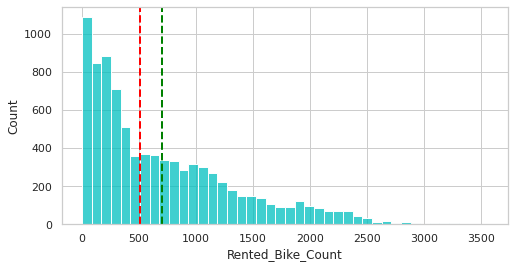

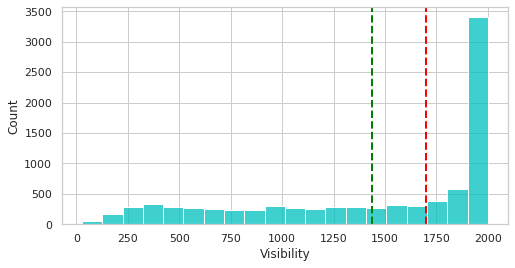

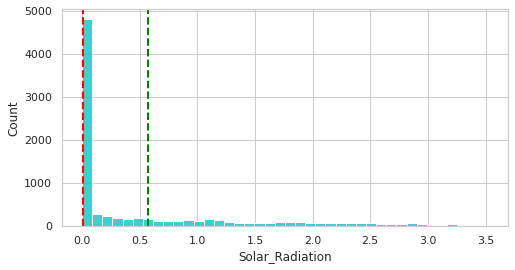

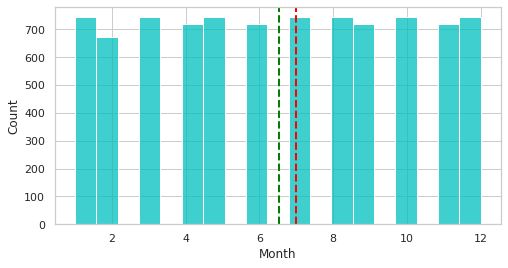

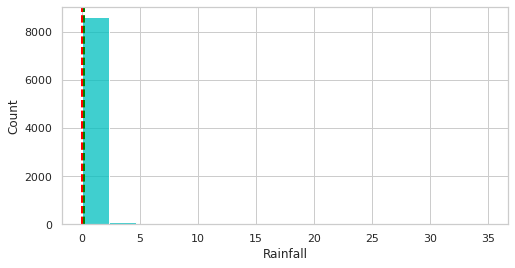

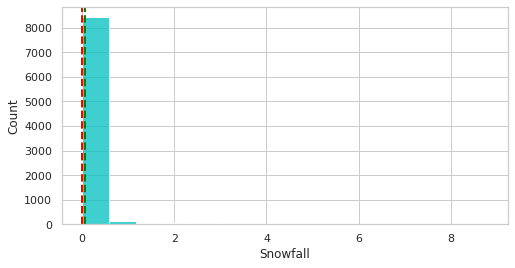

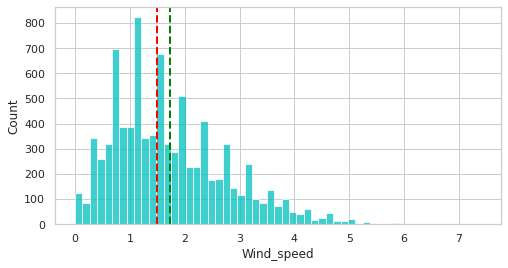

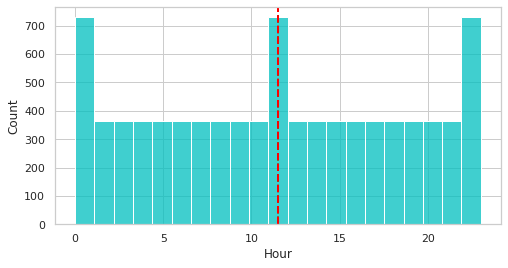

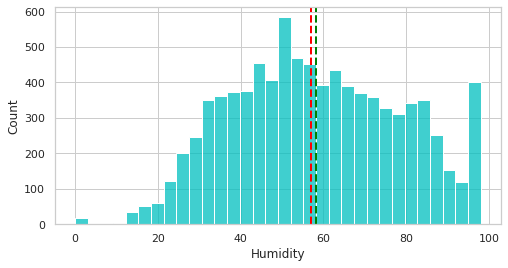

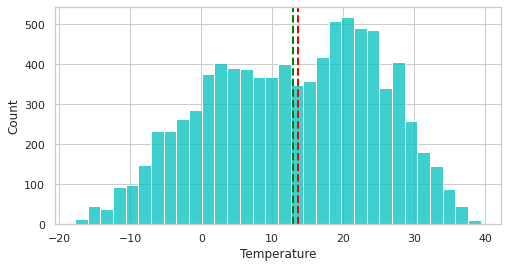

In [ ]:
#plotting histogram with mean and median

for col in num_fe[:]:
  plt.figure(figsize=(8,4))
  sns.histplot(a[col],color= 'c')
  plt.axvline(a[col].mean(), color='g', linestyle='dashed', linewidth=2)
  plt.axvline(a[col].median(), color='red', linestyle='dashed', linewidth=2)   
  plt.show()

**Observation:**

The features which are skewed, their mean and the median are also skewed.

**REGRESSION PLOTTING OF FEATURES**

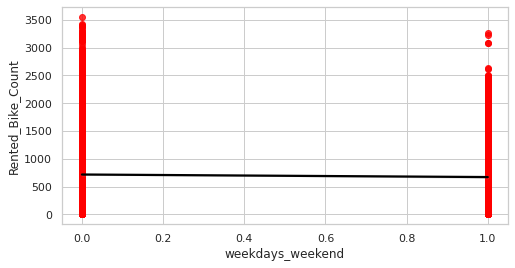

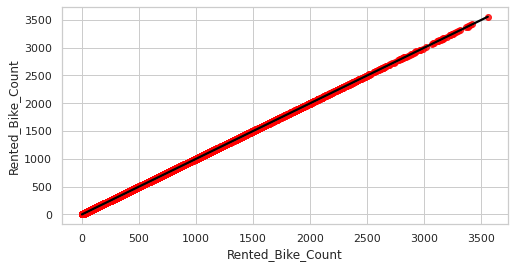

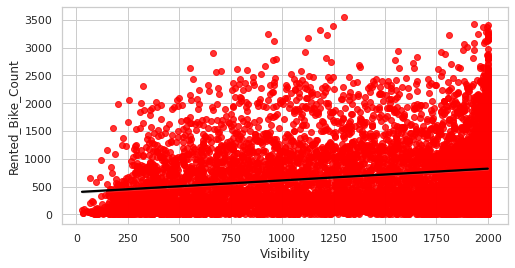

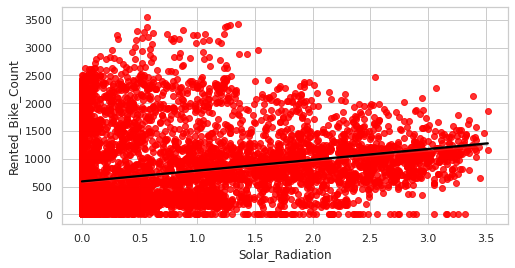

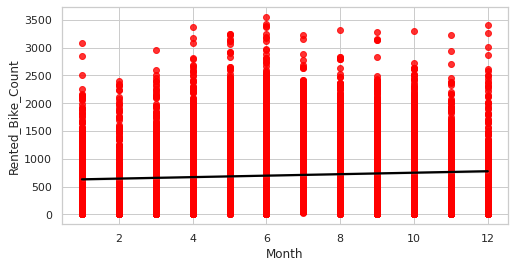

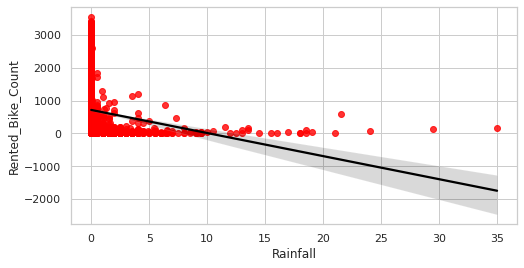

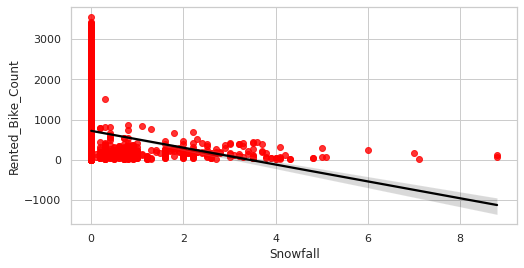

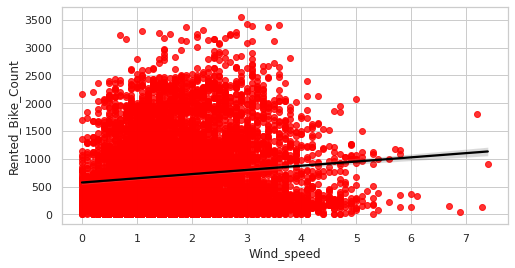

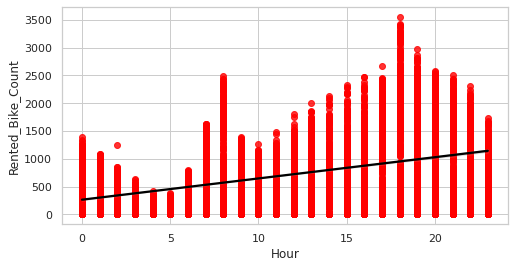

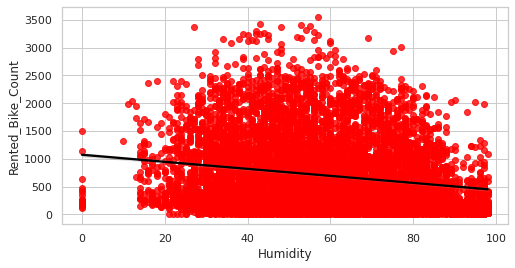

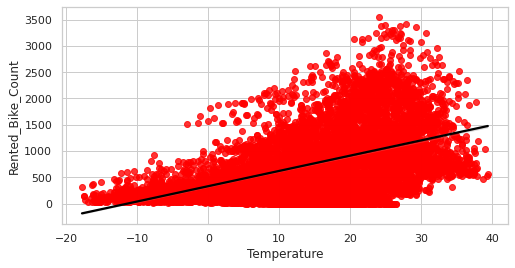

In [ ]:
#plotting the regression plot for all the numerical features

for col in num_fe:
  plt.figure(figsize=(8,4))
  sns.regplot(x=a[col],y=a['Rented_Bike_Count'],scatter_kws={"color": 'r'},line_kws={"color": "black"})

**Observations:**

The columns 'Hour', 'Temperature', 'Wind_speed', 'Visibility' and 'Solar_Radiation' are positively related to the dependent variable. Which means that the rented bike count increases with increase of these features.

Whereas, the columns 'Rainfall',  'Snowfall', 'Humidity' are those features which are negatively related with the dependent variable, which implies that the rented bike count decreases when these features increases.

**NORMALISING "RENTED_BIKE_COUNT" COLUMN DATA**

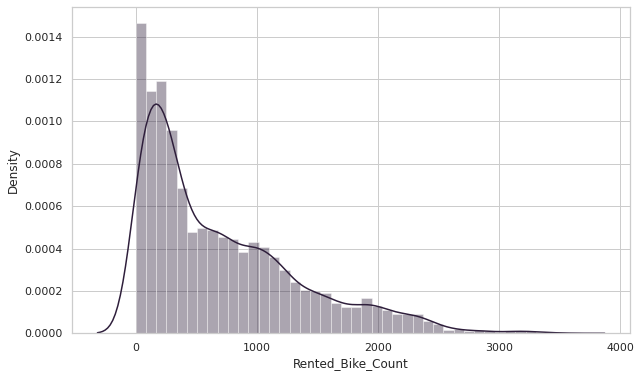

In [ ]:
# Distribution plot of Rented Bike Count
plt.figure(figsize=(10,6))
sns.distplot(a['Rented_Bike_Count'])
plt.show()

**Observations:**

Rented Bike Count has moderate skewness toward right. We already know that the assumption of linear regression tells us that the distribution of dependent variable has to be normal, hence we should perform some operation to make it normal.

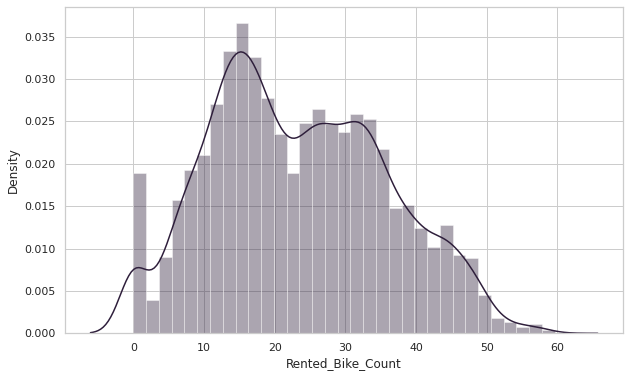

In [ ]:
#Applying square root for normalization

plt.figure(figsize=(10,6))
sns.distplot(np.sqrt(a['Rented_Bike_Count']))
plt.show()

After applying the Square Rooting the skewed Rented Bike Count, we almost got the normal distribution

**CREATING DUMMY VARIABLE AND PERFORMING THE ONE HOT ENCODING TO THE DATASET**

In [ ]:
a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Rented_Bike_Count  8760 non-null   int64  
 1   Hour               8760 non-null   int64  
 2   Temperature        8760 non-null   float64
 3   Humidity           8760 non-null   int64  
 4   Wind_speed         8760 non-null   float64
 5   Visibility         8760 non-null   int64  
 6   Solar_Radiation    8760 non-null   float64
 7   Rainfall           8760 non-null   float64
 8   Snowfall           8760 non-null   float64
 9   Seasons            8760 non-null   object 
 10  Holiday            8760 non-null   object 
 11  Functioning_Day    8760 non-null   object 
 12  Month              8760 non-null   int64  
 13  weekdays_weekend   8760 non-null   int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 958.2+ KB


In [ ]:
# Changing the int64 column into catagory column

cols=['Hour','Month','weekdays_weekend']
for col in cols:
  a[col]=a[col].astype('category')

In [ ]:
a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Rented_Bike_Count  8760 non-null   int64   
 1   Hour               8760 non-null   category
 2   Temperature        8760 non-null   float64 
 3   Humidity           8760 non-null   int64   
 4   Wind_speed         8760 non-null   float64 
 5   Visibility         8760 non-null   int64   
 6   Solar_Radiation    8760 non-null   float64 
 7   Rainfall           8760 non-null   float64 
 8   Snowfall           8760 non-null   float64 
 9   Seasons            8760 non-null   object  
 10  Holiday            8760 non-null   object  
 11  Functioning_Day    8760 non-null   object  
 12  Month              8760 non-null   category
 13  weekdays_weekend   8760 non-null   category
dtypes: category(3), float64(5), int64(3), object(3)
memory usage: 779.8+ KB


In [ ]:
# Using Pandas get Dummies for Encoding categorical features

b = pd.get_dummies(a,drop_first=True,sparse=True)
b.head()

,Rented_Bike_Count,Temperature,Humidity,Wind_speed,Visibility,Solar_Radiation,Rainfall,Snowfall,Hour_1,Hour_2,...,Month_4,Month_5,Month_6,Month_7,Month_8,Month_9,Month_10,Month_11,Month_12,weekdays_weekend_1
0,254,-5.2,37,2.2,2000,0.0,0.0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,204,-5.5,38,0.8,2000,0.0,0.0,0.0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,173,-6.0,39,1.0,2000,0.0,0.0,0.0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,107,-6.2,40,0.9,2000,0.0,0.0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,78,-6.0,36,2.3,2000,0.0,0.0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
b.columns

Index(['Rented_Bike_Count', 'Temperature', 'Humidity', 'Wind_speed',
       'Visibility', 'Solar_Radiation', 'Rainfall', 'Snowfall', 'Hour_1',
       'Hour_2', 'Hour_3', 'Hour_4', 'Hour_5', 'Hour_6', 'Hour_7', 'Hour_8',
       'Hour_9', 'Hour_10', 'Hour_11', 'Hour_12', 'Hour_13', 'Hour_14',
       'Hour_15', 'Hour_16', 'Hour_17', 'Hour_18', 'Hour_19', 'Hour_20',
       'Hour_21', 'Hour_22', 'Hour_23', 'Seasons_Spring', 'Seasons_Summer',
       'Seasons_Winter', 'Holiday_No Holiday', 'Functioning_Day_Yes',
       'Month_2', 'Month_3', 'Month_4', 'Month_5', 'Month_6', 'Month_7',
       'Month_8', 'Month_9', 'Month_10', 'Month_11', 'Month_12',
       'weekdays_weekend_1'],
      dtype='object')

**MODEL TRAINING**

In [ ]:
# Data spliting and value assigning to variables for Reggression

X = b.drop(columns = ['Rented_Bike_Count'] , axis = 1)
y = np.sqrt(b['Rented_Bike_Count'])  # because of skewness

In [ ]:
# Train test spliting

X_train,X_test,y_train,y_test = train_test_split(X,y ,test_size = 0.25, random_state = 0)
print(X_train.shape)
X_test.shape

(6570, 47)


(2190, 47)

**(1) LINEAR REGRESSION**

In [ ]:
# Implement Linear Regression

lr = LinearRegression().fit(X_train,y_train)

In [ ]:
# Checking Coefficent

lr.coef_

array([ 4.76592857e-01, -1.37389872e-01, -1.45055135e-01,  5.60074648e-04,
        1.09746012e+00, -1.47539559e+00,  1.91445977e-02, -1.98243149e+00,
       -5.02829279e+00, -7.33272935e+00, -9.57684190e+00, -9.14567640e+00,
       -4.15101144e+00,  2.10516425e+00,  7.21001444e+00,  9.18589247e-01,
       -3.49505813e+00, -3.79366402e+00, -3.07652970e+00, -3.28984917e+00,
       -3.46328474e+00, -2.12611279e+00,  2.63457209e-02,  3.81196406e+00,
        1.02756294e+01,  6.86306739e+00,  6.21187858e+00,  6.33587517e+00,
        5.07654627e+00,  1.45916926e+00, -2.62867121e+00, -3.38160787e+00,
       -6.54244484e+00,  2.95423516e+00,  2.77747454e+01, -8.06203753e-01,
        2.64506479e-01,  3.22771507e-01,  1.45208025e+00,  4.35283784e+00,
       -1.95727651e-01, -7.51151800e-01,  3.32783165e-01,  2.19197225e+00,
        1.08610102e+00,  1.19136471e+00, -7.27039129e-01])

In [ ]:
# Checking score

lr.score(X_train,y_train)

0.7557884266778845

In [ ]:
# Predicted Train & Test values
 
y_pred_train = lr.predict(X_train)
y_pred_test = lr.predict(X_test)

In [ ]:
# Calculating Performance(Evaluation) Metrics for train data

# 1. MSE
MSE = mean_squared_error((y_train), (y_pred_train))
print('MSE :',MSE)

# 2. RSME
RMSE = np.sqrt(MSE)
print("RMSE :",RMSE)

#3. MAE
MAE = mean_absolute_error((y_train), (y_pred_train))
print('MAE :', MAE)

# R2
R2 = r2_score((y_train), (y_pred_train))
print('R2 :', R2)

# Adjusted R2
Adj_R2 = (1-(1-r2_score(y_train, y_pred_train))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print( 'Adjusted R2 :', Adj_R2)

MSE : 37.60630594639787
RMSE : 6.132398058377968
MAE : 4.658244745512172
R2 : 0.7557884266778845
Adjusted R2 : 0.7504299094294534


In [ ]:
# Making a dataset for comparing performance metrics later

dict1={'Model':'Linear regression ',
       'MAE':round((MAE),3),
       'MSE':round((MSE),3),
       'RMSE':round((RMSE),3),
       'R2':round((R2),3),
       'Adj_R2':round((Adj_R2 ),2)
       }
training_df=pd.DataFrame(dict1,index=[0])

In [ ]:
# Calculating Performance Metrics for test data

# 1. MSE
MSE = mean_squared_error((y_test), (y_pred_test))
print('MSE :',MSE)

# 2. RSME
RMSE = np.sqrt(MSE)
print("RMSE :",RMSE)

#3. MAE
MAE = mean_absolute_error((y_test), (y_pred_test))
print('MAE :', MAE)

# R2
R2 = r2_score((y_test), (y_pred_test))
print('R2 :', R2)

# Adjusted R2
Adj_R2 = (1-(1-r2_score(y_test, y_pred_test))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print( 'Adjusted R2 :', Adj_R2)

MSE : 36.64474647323363
RMSE : 6.053490437196843
MAE : 4.658361507344821
R2 : 0.7680218977120631
Adjusted R2 : 0.762931808632916


In [ ]:
# Making a dataset for comparing performance metrics later

dict2={'Model':'Linear regression ',
       'MAE':round((MAE),3),
       'MSE':round((MSE),3),
       'RMSE':round((RMSE),3),
       'R2':round((R2),3),
       'Adj_R2':round((Adj_R2 ),2)
       }
test_df=pd.DataFrame(dict2,index=[0])

 **(2) RIDGE REGRESSION (L2 REGULARIZATION)**

We apply GridSearch CV (Hyperparameter Tunning) for best model 

In [ ]:
ri=Ridge()

In [ ]:
par={'alpha':[0.001,0.01,0.1,1, 10]}

In [ ]:
rr=GridSearchCV(ri,par,scoring="neg_mean_squared_error",cv=5)

In [ ]:
rr.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 1, 10]},
             scoring='neg_mean_squared_error')

In [ ]:
rr.best_params_

{'alpha': 1}

In [ ]:
y_pred_train_ridge=rr.predict(X_train)
y_pred_test_ridge=rr.predict(X_test)


In [ ]:
# Calculating Performance Metrics for train data

# 1. MSE
MSE = mean_squared_error((y_train), (y_pred_train_ridge))
print('MSE :',MSE)

# 2. RSME
RMSE = np.sqrt(MSE)
print("RMSE :",RMSE)

#3. MAE
MAE = mean_absolute_error((y_train), (y_pred_train_ridge))
print('MAE :', MAE)

# R2
R2 = r2_score((y_train), (y_pred_train_ridge))
print('R2 :', R2)

# Adjusted R2
Adj_R2 = (1-(1-r2_score(y_train, y_pred_train_ridge))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print( 'Adjusted R2 :', Adj_R2)

MSE : 37.60756835088131
RMSE : 6.132500986618862
MAE : 4.659277641810286
R2 : 0.7557802287499756
Adjusted R2 : 0.7504215316217071


In [ ]:
# Making a dataset for comparing performance metrics later

dict1={'Model':'Ridge regression',
       'MAE':round((MAE),3),
       'MSE':round((MSE),3),
       'RMSE':round((RMSE),3),
       'R2':round((R2),3),
       'Adj_R2':round((Adj_R2 ),2)
       }
training_df=training_df.append(dict1,ignore_index=True)

In [ ]:
# Calculating Performance Metrics for test data

# 1. MSE
MSE = mean_squared_error((y_test), (y_pred_test_ridge))
print('MSE :',MSE)

# 2. RSME
RMSE = np.sqrt(MSE)
print("RMSE :",RMSE)

#3. MAE
MAE = mean_absolute_error((y_test), (y_pred_test_ridge))
print('MAE :', MAE)

# R2
R2 = r2_score((y_test), (y_pred_test_ridge))
print('R2 :', R2)

# Adjusted R2
Adj_R2 = (1-(1-r2_score(y_test, y_pred_test_ridge))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print( 'Adjusted R2 :', Adj_R2)

MSE : 36.66420939832801
RMSE : 6.055097802540271
MAE : 4.661012167283227
R2 : 0.7678986884429891
Adjusted R2 : 0.7628058958924852


In [ ]:
# Making a dataset for comparing performance metrics later

dict2={'Model':'Ridge regression',
       'MAE':round((MAE),3),
       'MSE':round((MSE),3),
       'RMSE':round((RMSE),3),
       'R2':round((R2),3),
       'Adj_R2':round((Adj_R2 ),2)
       }
test_df=test_df.append(dict2,ignore_index=True)

**(3) LASSO REGRESSION (L1 REGULARIZATION)**

We apply GridSearch CV (Hyperparameter Tunning) for best model

In [ ]:
la=Lasso()

In [ ]:
pa={'alpha':[0.001,0.01,0.1,1, 10]}

In [ ]:
lasso=GridSearchCV(la,pa,scoring="neg_mean_squared_error",cv=5)

In [ ]:
lasso.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 1, 10]},
             scoring='neg_mean_squared_error')

In [ ]:
lasso.best_params_

{'alpha': 0.001}

In [ ]:
# Predicted Train & Test values
y_pred_train_lasso=lasso.predict(X_train)
y_pred_test_lasso=lasso.predict(X_test)

In [ ]:
# Calculating Performance Metrics for train data

# 1. MSE
MSE = mean_squared_error((y_train), (y_pred_train_lasso))
print('MSE :',MSE)

# 2. RSME
RMSE = np.sqrt(MSE)
print("RMSE :",RMSE)

#3. MAE
MAE = mean_absolute_error((y_train), (y_pred_train_lasso))
print('MAE :', MAE)

# R2
R2 = r2_score((y_train), (y_pred_train_lasso))
print('R2 :', R2)

# Adjusted R2
Adj_R2 = (1-(1-r2_score(y_train, y_pred_train_lasso))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print( 'Adjusted R2 :', Adj_R2)

MSE : 37.607811550139175
RMSE : 6.132520815304191
MAE : 4.65804755253239
R2 : 0.755778649438424
Adjusted R2 : 0.7504199176567274


In [ ]:
# Making a dataset for comparing performance metrics later

dict1={'Model':'Lasso regression',
       'MAE':round((MAE),3),
       'MSE':round((MSE),3),
       'RMSE':round((RMSE),3),
       'R2':round((R2),3),
       'Adj_R2':round((Adj_R2 ),2)
       }
training_df=training_df.append(dict1,ignore_index=True)

In [ ]:
# Calculating Performance Metrics for test data

# 1. MSE
MSE = mean_squared_error((y_test), (y_pred_test_lasso))
print('MSE :',MSE)

# 2. RSME
RMSE = np.sqrt(MSE)
print("RMSE :",RMSE)

#3. MAE
MAE = mean_absolute_error((y_test), (y_pred_test_lasso))
print('MAE :', MAE)

# R2
R2 = r2_score((y_test), (y_pred_test_lasso))
print('R2 :', R2)

# Adjusted R2
Adj_R2 = (1-(1-r2_score(y_test, y_pred_test_lasso))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print( 'Adjusted R2 :', Adj_R2)

MSE : 36.64658374716281
RMSE : 6.053642188564072
MAE : 4.658578791405534
R2 : 0.7680102669229188
Adjusted R2 : 0.762919922639715


In [ ]:
# Making a dataset for comparing performance metrics later

dict2={'Model':'Lasso regression',
       'MAE':round((MAE),3),
       'MSE':round((MSE),3),
       'RMSE':round((RMSE),3),
       'R2':round((R2),3),
       'Adj_R2':round((Adj_R2 ),2)
       }
test_df=test_df.append(dict2,ignore_index=True)

**(4) Elastic Net Regression**

We apply GridSearch CV (Hyperparameter Tunning) for best model

In [ ]:
el=ElasticNet()

In [ ]:
param={'alpha':[0.001,0.01,0.1,1, 10],'l1_ratio':[0.3,0.4,0.5,0.7,0.8]}

In [ ]:
elas=GridSearchCV(el,param,scoring="neg_mean_squared_error",cv=5)

In [ ]:
elas.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 1, 10],
                         'l1_ratio': [0.3, 0.4, 0.5, 0.7, 0.8]},
             scoring='neg_mean_squared_error')

In [ ]:
elas.best_params_

{'alpha': 0.001, 'l1_ratio': 0.8}

In [ ]:
# Train Test values
y_pred_train_en=elas.predict(X_train)
y_pred_test_en=elas.predict(X_test)

In [ ]:
# Calculating Performance Metrics for Train data

# 1. MSE
MSE = mean_squared_error((y_train), (y_pred_train_en))
print('MSE :',MSE)

# 2. RSME
RMSE = np.sqrt(MSE)
print("RMSE :",RMSE)

#3. MAE
MAE = mean_absolute_error((y_train), (y_pred_train_en))
print('MAE :', MAE)

# R2
R2 = r2_score((y_train), (y_pred_train_en))
print('R2 :', R2)

# Adjusted R2
Adj_R2 = (1-(1-r2_score(y_train, y_pred_train_en))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print( 'Adjusted R2 :', Adj_R2)

MSE : 37.611331010724605
RMSE : 6.132807759152785
MAE : 4.659554962424988
R2 : 0.7557557944149065
Adjusted R2 : 0.7503965611457658


In [ ]:
# Making a dataset for comparing performance metrics later

dict1={'Model':'Elasticnet regression',
       'MAE':round((MAE),3),
       'MSE':round((MSE),3),
       'RMSE':round((RMSE),3),
       'R2':round((R2),3),
       'Adj_R2':round((Adj_R2 ),2)
       }
training_df=training_df.append(dict1,ignore_index=True)

In [ ]:
# Calculating Performance Metrics for test data

# 1. MSE
MSE = mean_squared_error((y_test), (y_pred_test_en))
print('MSE :',MSE)

# 2. RSME
RMSE = np.sqrt(MSE)
print("RMSE :",RMSE)

#3. MAE
MAE = mean_absolute_error((y_test), (y_pred_test_en))
print('MAE :', MAE)

# R2
R2 = r2_score((y_test), (y_pred_test_en))
print('R2 :', R2)

# Adjusted R2
Adj_R2 = (1-(1-r2_score(y_test, y_pred_test_en))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print( 'Adjusted R2 :', Adj_R2)

MSE : 36.674040106799865
RMSE : 6.055909519370304
MAE : 4.662171299979923
R2 : 0.7678364555360945
Adjusted R2 : 0.7627422974642908


In [ ]:
# Making a dataset for comparing performance metrics later

dict2={'Model':'Elasticnet regression',
       'MAE':round((MAE),3),
       'MSE':round((MSE),3),
       'RMSE':round((RMSE),3),
       'R2':round((R2),3),
       'Adj_R2':round((Adj_R2 ),2)
       }
test_df=test_df.append(dict2,ignore_index=True)

**(5) DECISION TREE REGRESSION**

In [ ]:
#Initilazing the model
dt_regressor = DecisionTreeRegressor(criterion='mse', max_depth=10, max_features=9, max_leaf_nodes=1000)

In [ ]:
dt_regressor.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=10, max_features=9,
                      max_leaf_nodes=1000)

In [ ]:
#Train Test values
y_pred_train_d = dt_regressor.predict(X_train)
y_pred_test_d = dt_regressor.predict(X_test)

In [ ]:
# Calculating Performance Metrics for train data

# 1. MSE
MSE = mean_squared_error((y_train), (y_pred_train_d))
print('MSE :',MSE)

# 2. RSME
RMSE = np.sqrt(MSE)
print("RMSE :",RMSE)

#3. MAE
MAE = mean_absolute_error((y_train), (y_pred_train_d))
print('MAE :', MAE)

# R2
R2 = r2_score((y_train), (y_pred_train_d))
print('R2 :', R2)

# Adjusted R2
Adj_R2 = (1-(1-r2_score(y_train, y_pred_train_d))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print( 'Adjusted R2 :', Adj_R2)

MSE : 31.921343997436214
RMSE : 5.6498976979619915
MAE : 4.043411953625103
R2 : 0.7927059985290296
Adjusted R2 : 0.7881575307096386


In [ ]:
# Making a dataset for comparing performance metrics later

dict1={'Model':'Decision tree regression',
       'MAE':round((MAE),3),
       'MSE':round((MSE),3),
       'RMSE':round((RMSE),3),
       'R2':round((R2),3),
       'Adj_R2':round((Adj_R2 ),2)
       }
training_df=training_df.append(dict1,ignore_index=True)

In [ ]:
# Calculating Performance Metrics for Test data

# 1. MSE
MSE = mean_squared_error((y_test), (y_pred_test_d))
print('MSE :',MSE)

# 2. RSME
RMSE = np.sqrt(MSE)
print("RMSE :",RMSE)

#3. MAE
MAE = mean_absolute_error((y_test), (y_pred_test_d))
print('MAE :', MAE)

# R2
R2 = r2_score((y_test), (y_pred_test_d))
print('R2 :', R2)

# Adjusted R2
Adj_R2 = (1-(1-r2_score(y_test, y_pred_test_d))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print( 'Adjusted R2 :', Adj_R2)

MSE : 44.565083373471325
RMSE : 6.675708454798736
MAE : 4.7310433363274385
R2 : 0.7178825216642493
Adjusted R2 : 0.7116922688716347


In [ ]:
# Making a dataset for comparing performance metrics later

dict2={'Model':'Decision tree regression',
       'MAE':round((MAE),3),
       'MSE':round((MSE),3),
       'RMSE':round((RMSE),3),
       'R2':round((R2),3),
       'Adj_R2':round((Adj_R2 ),2)
       }
test_df=test_df.append(dict2,ignore_index=True)

**(6) RANDOM FOREST REGRESSION**

We apply GridSearch CV (Hyperparameter Tunning) for best model

In [ ]:
# Implement RF  Model

rf= RandomForestRegressor()

In [ ]:
para={"n_estimators":[50,80,100],"max_depth":[3,5,7,9]}

In [ ]:
rfr=GridSearchCV(rf,para,scoring="neg_mean_squared_error",cv=5)

In [ ]:
rfr.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [3, 5, 7, 9],
                         'n_estimators': [50, 80, 100]},
             scoring='neg_mean_squared_error')

In [ ]:
rfr.best_params_

{'max_depth': 9, 'n_estimators': 80}

In [ ]:
#Train test values
y_pred_train_rf = rfr.predict(X_train)
y_pred_test_rf = rfr.predict(X_test)

In [ ]:
# Calculating Performance Metrics for train data

# 1. MSE
MSE = mean_squared_error((y_train), (y_pred_train_rf))
print('MSE :',MSE)

# 2. RSME
RMSE = np.sqrt(MSE)
print("RMSE :",RMSE)

#3. MAE
MAE = mean_absolute_error((y_train), (y_pred_train_rf))
print('MAE :', MAE)

# R2
R2 = r2_score((y_train), (y_pred_train_rf))
print('R2 :', R2)

# Adjusted R2
Adj_R2 = (1-(1-r2_score(y_train, y_pred_train_rf))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print( 'Adjusted R2 :', Adj_R2)

MSE : 23.851369228994255
RMSE : 4.8837863619321285
MAE : 3.5520864860628865
R2 : 0.8451116040591243
Adjusted R2 : 0.8417130258101883


In [ ]:
# Making a dataset for comparing performance metrics later

dict1={'Model':'Random forest regression',
       'MAE':round((MAE),3),
       'MSE':round((MSE),3),
       'RMSE':round((RMSE),3),
       'R2':round((R2),3),
       'Adj_R2':round((Adj_R2 ),2)
       }
training_df=training_df.append(dict1,ignore_index=True)

In [ ]:
# Calculating Performance Metrics for Test data

# 1. MSE
MSE = mean_squared_error((y_test), (y_pred_test_rf))
print('MSE :',MSE)

# 2. RSME
RMSE = np.sqrt(MSE)
print("RMSE :",RMSE)

#3. MAE
MAE = mean_absolute_error((y_test), (y_pred_test_rf))
print('MAE :', MAE)

# R2
R2 = r2_score((y_test), (y_pred_test_rf))
print('R2 :', R2)

# Adjusted R2
Adj_R2 = (1-(1-r2_score(y_test, y_pred_test_rf))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print( 'Adjusted R2 :', Adj_R2)

MSE : 28.993770105881403
RMSE : 5.384586344918373
MAE : 3.876821407635059
R2 : 0.8164560976769784
Adjusted R2 : 0.8124287571498159


In [ ]:
# Making a dataset for comparing performance metrics later

dict2={'Model':'Random forest regression',
       'MAE':round((MAE),3),
       'MSE':round((MSE),3),
       'RMSE':round((RMSE),3),
       'R2':round((R2),3),
       'Adj_R2':round((Adj_R2 ),2)
       }
test_df=test_df.append(dict2,ignore_index=True)

**(7) GRADIENT BOOSTING REGRESSion**

We apply GridSearch CV (Hyperparameter Tunning) for best model

In [ ]:
gb=GradientBoostingRegressor()

In [ ]:
params= {'n_estimators' : [50,80,100],'max_depth' :[4,6,8]}

In [ ]:
gbr=GridSearchCV(gb,params,cv=5,scoring="neg_mean_squared_error")

In [ ]:
gbr.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(),
             param_grid={'max_depth': [4, 6, 8], 'n_estimators': [50, 80, 100]},
             scoring='neg_mean_squared_error')

In [ ]:
gbr.best_params_

{'max_depth': 8, 'n_estimators': 100}

In [ ]:
#Train test values
y_pred_train_rf = gbr.predict(X_train)
y_pred_test_rf = gbr.predict(X_test)

In [ ]:
# Calculating Performance Metrics for train data

# 1. MSE
MSE = mean_squared_error((y_train), (y_pred_train_rf))
print('MSE :',MSE)

# 2. RSME
RMSE = np.sqrt(MSE)
print("RMSE :",RMSE)

#3. MAE
MAE = mean_absolute_error((y_train), (y_pred_train_rf))
print('MAE :', MAE)

# R2
R2 = r2_score((y_train), (y_pred_train_rf))
print('R2 :', R2)

# Adjusted R2
Adj_R2 = (1-(1-r2_score(y_train, y_pred_train_rf))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print( 'Adjusted R2 :', Adj_R2)

MSE : 3.688427767446037
RMSE : 1.9205279918413156
MAE : 1.3314521320660702
R2 : 0.9760477205749252
Adjusted R2 : 0.9755221570207802


In [ ]:
# Making a dataset for comparing performance metrics later

dict1={'Model':'Gradient Boosting Regression',
       'MAE':round((MAE),3),
       'MSE':round((MSE),3),
       'RMSE':round((RMSE),3),
       'R2':round((R2),3),
       'Adj_R2':round((Adj_R2 ),2)
       }
training_df=training_df.append(dict1,ignore_index=True)

In [ ]:
# Calculating Performance Metrics for Test data

# 1. MSE
MSE = mean_squared_error((y_test), (y_pred_test_rf))
print('MSE :',MSE)

# 2. RSME
RMSE = np.sqrt(MSE)
print("RMSE :",RMSE)

#3. MAE
MAE = mean_absolute_error((y_test), (y_pred_test_rf))
print('MAE :', MAE)

# R2
R2 = r2_score((y_test), (y_pred_test_rf))
print('R2 :', R2)

# Adjusted R2
Adj_R2 = (1-(1-r2_score(y_test, y_pred_test_rf))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print( 'Adjusted R2 :', Adj_R2)

MSE : 14.252007422670152
RMSE : 3.775183097900041
MAE : 2.5457843542476235
R2 : 0.9097782368853466
Adjusted R2 : 0.9077985810186853


In [ ]:
# Making a dataset for comparing performance metrics later

dict2={'Model':'Gradient Boosting Regression',
       'MAE':round((MAE),3),
       'MSE':round((MSE),3),
       'RMSE':round((RMSE),3),
       'R2':round((R2),3),
       'Adj_R2':round((Adj_R2 ),2)
       }
test_df=test_df.append(dict2,ignore_index=True)

Here we get high R2 value so we will check overfitting 

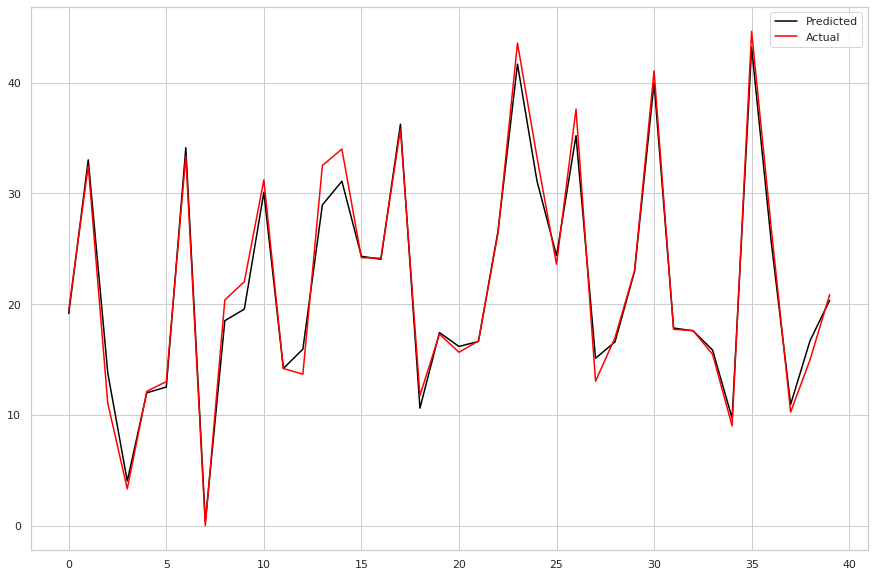

In [ ]:
#Plotting the figure
plt.figure(figsize=(15,10))
plt.plot(np.array(y_pred_train_rf)[:40], color='k')
plt.plot(np.array(y_train)[:40], color='r')
plt.legend(["Predicted","Actual"])
plt.show()

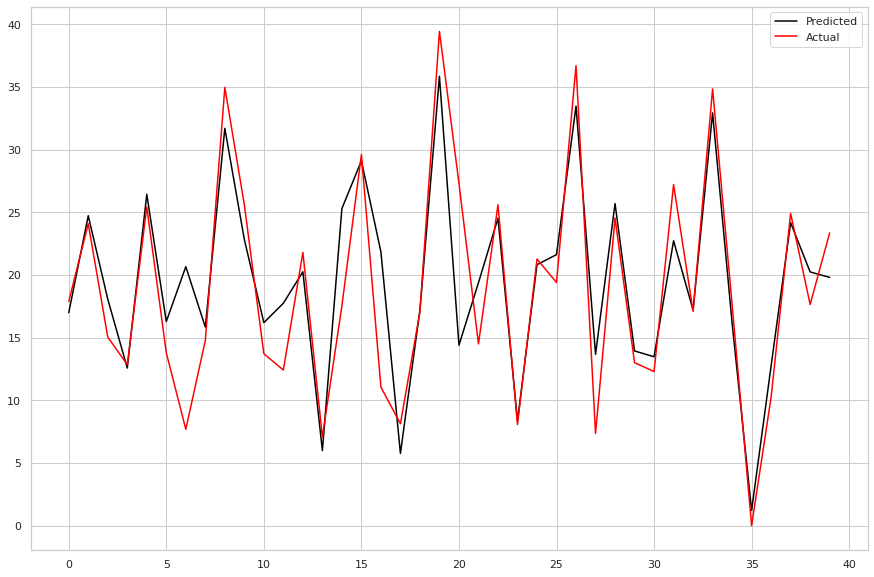

In [ ]:
#Plotting the figure
plt.figure(figsize=(15,10))
plt.plot(np.array(y_pred_test_rf)[:40], color='k')
plt.plot(np.array(y_test)[:40], color='r')
plt.legend(["Predicted","Actual"])
plt.show()

No Overfitting here

**FEATURE IMPORTANCE**

In [ ]:
gbr.best_estimator_

GradientBoostingRegressor(max_depth=8)

In [ ]:
gb_optimal_model = gbr.best_estimator_

In [ ]:
gb_optimal_model.feature_importances_

array([3.18618034e-01, 1.59271084e-01, 8.90717550e-03, 1.01024744e-02,
       3.25535293e-02, 4.03148328e-02, 1.33194818e-03, 1.66519267e-03,
       9.55911505e-03, 1.85436134e-02, 2.73843324e-02, 2.30450099e-02,
       5.98140814e-03, 4.40060653e-03, 1.22925066e-02, 8.69739082e-04,
       3.61436352e-03, 2.02816682e-03, 1.96821514e-04, 1.77669425e-04,
       3.42102780e-04, 5.74842846e-04, 1.90441685e-03, 9.95318646e-03,
       3.03005323e-02, 1.78081477e-02, 1.45070615e-02, 1.66241190e-02,
       1.32406615e-02, 3.67217157e-03, 6.73890676e-03, 1.59225203e-03,
       1.64675491e-02, 3.43095562e-03, 1.54187708e-01, 8.36904891e-04,
       1.56503653e-03, 1.23085969e-03, 1.42409159e-03, 1.87279129e-03,
       7.13981292e-04, 1.65526660e-03, 1.82039203e-03, 2.54223088e-03,
       2.80505863e-03, 2.49676425e-04, 1.10814736e-02])

In [ ]:
features = X_train.columns
importance = gb_optimal_model.feature_importances_
index = np.argsort(importance)

Text(0.5, 0, 'Relative Importance')

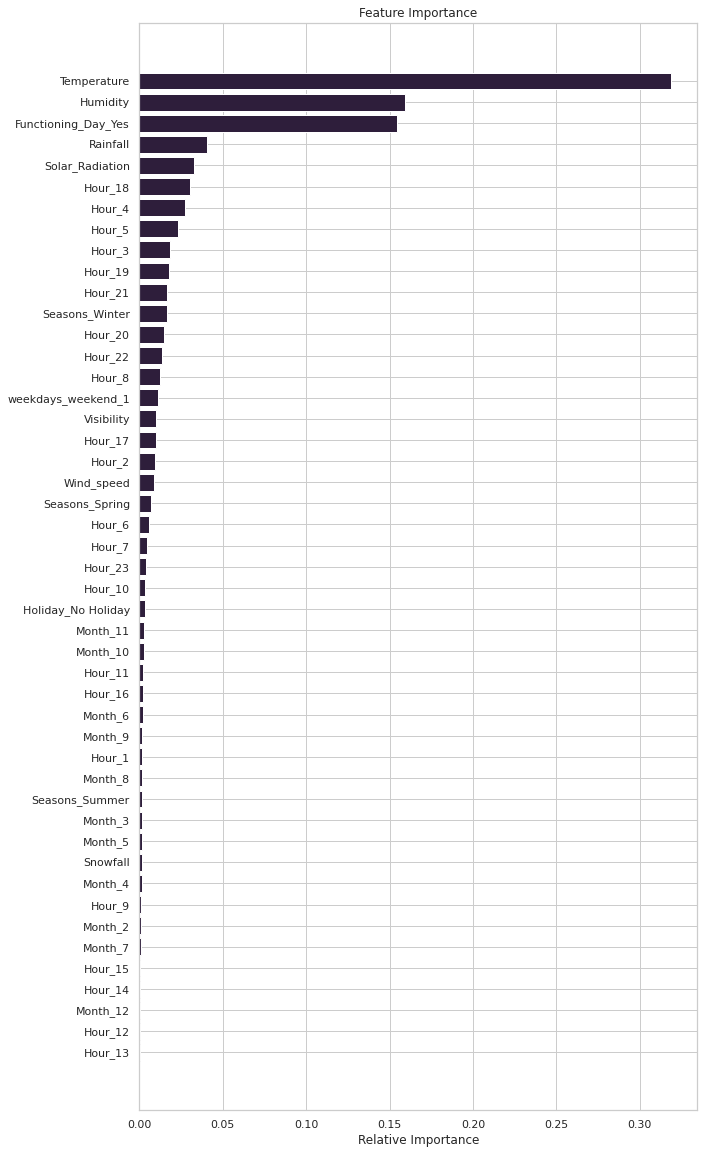

In [ ]:
#Plot the figure
plt.figure(figsize=(10,20))
plt.title('Feature Importance')
plt.barh(range(len(index)), importance[index],align='center')
plt.yticks(range(len(index)), [features[i] for i in index])
plt.xlabel('Relative Importance')

Here we can say that temperature has a highest weightage

**EVALUATION MATERICS FOR TRAINING AND TESTING DATASET (Different models)**

In [ ]:
# displaying the results of evaluation metric values for all models

result=pd.concat([training_df,test_df],keys=['Training set','Test set'])
result

Model    MAE     MSE   RMSE     R2  \
Training set 0            Linear regression   4.658  37.606  6.132  0.756   
             1              Ridge regression  4.659  37.608  6.133  0.756   
             2              Lasso regression  4.658  37.608  6.133  0.756   
             3         Elasticnet regression  4.660  37.611  6.133  0.756   
             4      Decision tree regression  4.043  31.921  5.650  0.793   
             5      Random forest regression  3.552  23.851  4.884  0.845   
             6  Gradient Boosting Regression  1.331   3.688  1.921  0.976   
Test set     0            Linear regression   4.658  36.645  6.053  0.768   
             1              Ridge regression  4.661  36.664  6.055  0.768   
             2              Lasso regression  4.659  36.647  6.054  0.768   
             3         Elasticnet regression  4.662  36.674  6.056  0.768   
             4      Decision tree regression  4.731  44.565  6.676  0.718   
             5      Random forest regression  3.877  28.994  5.385  0.816   
             6  Gradient Boosting Regression  2.546  14.252  3.775  0.910   

                Adj_R2  
Training set 0    0.75  
             1    0.75  
             2    0.75  
             3    0.75  
             4    0.79  
             5    0.84  
             6    0.98  
Test set     0    0.76  
             1    0.76  
             2    0.76  
             3    0.76  
             4    0.71  
             5    0.81  
             6    0.91

**FINAL OBSERVATION**



**1.   Out of all above models Gradient Boosting Regressor gives the highest R2 score of 0.98 for Train Set & 0.91 for Test set and Random Forest gives the  R2 score 0.84 for Train Set  & 0.81 for Test Set .**

**2.   No overfitting is seen.**

**3.   We can deploy Gradient Boosting Regressor model or Random Forest.**
